In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names=['Exam1','Exam2','Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


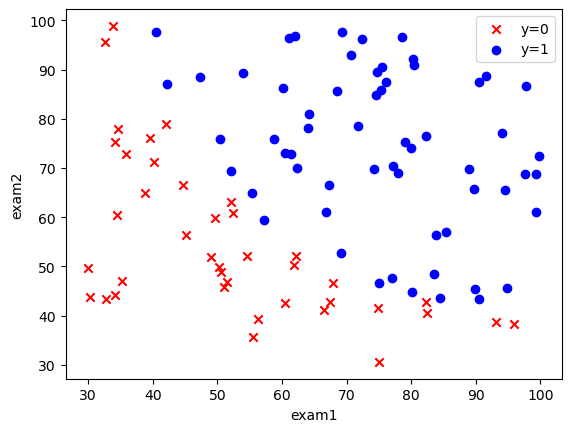

In [3]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

In [4]:
def get_Xy(data):
    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values
    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)
    return X,y

In [5]:
X,y = get_Xy(data)

In [6]:
X.shape

(100, 3)

In [7]:
y.shape

(100, 1)

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def costFunction(X,y,theta):
    A = sigmoid(X@theta)
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    return -np.sum(first + second) / len(X)

In [10]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [11]:
cost_init = costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [18]:
def gradientDesscent(X,y,theta,alpha,iters):
    m = len(X)
    costs = []
    for i in range(iters):
        A = sigmoid(X@theta)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        theta = theta - (X.T @ (A - y))* alpha / len(X)
        if i % 1000 == 0:
            print(cost)
    
    return costs,theta
    

In [19]:
alpha = 0.004
iters = 200000

In [20]:
costs,theta_final = gradientDesscent(X,y,theta,alpha,iters)

0.6931471805599453
1.8829158239568053
3.03727990612506
5.47109975896728
1.836300591020885
2.9139783826257375
5.422227941381874
1.7886098175014726
2.7898484821137446
5.371561542956996
1.7397253149918432
2.665095089448256
5.318664583781819
1.6892680026012499
2.5403972937885984
5.262761699757286
1.6365530665862353
2.416991500356434
5.202715286859566
1.5805970054308145
2.2966289247668445
5.137075939939502
1.5202084629766675
2.1813551513737313
5.0642278199358906
1.4541676242277009
2.0730926838376567
4.982596862732572
1.3814322716266059
1.973069484331459
4.890794398234964
1.3012235841765178
1.8812019822182404
4.787477386097684
1.2128029263700544
1.7955328507760833
4.6706541527062795
1.1147546600898597
1.7115958748179052
4.535934636205579
1.003326236576
1.6206760273339993
4.371312651031852
0.8667549378062717
1.4994019044839553
4.118294010527239
0.637140295059773
0.6742213517037681
0.4375083623123468
1.3180570610489792
2.854139451625989
0.539577601100868
0.4232953113285741
3.7545880574286663
0

In [21]:
theta_final

array([[-23.7726851 ],
       [  0.20687749],
       [  0.1999796 ]])

In [22]:
def predict(X,theta):
    prob = sigmoid(X@theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [23]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc = np.mean(y_pre == y)
print(acc)

0.91


In [24]:
coef1 = - theta_final[0,0]/theta_final[2,0]
coef2 = - theta_final[1,0]/theta_final[2,0]

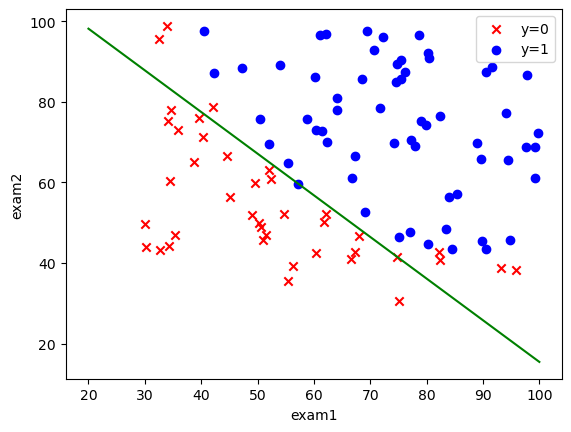

In [26]:
x = np.linspace(20,100,100)
f = coef1 + coef2 * x

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
ax.plot(x,f,c='g')
plt.show()